In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
#get the stock data
df = web.DataReader('AAPL', data_source='yahoo' , start='2012-01-01' , end='2022-02-24')

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575915
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643499
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783866
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897016
...,...,...,...,...,...,...
2022-02-17,171.910004,168.470001,171.029999,168.880005,69589300.0,168.880005
2022-02-18,170.539993,166.190002,169.820007,167.300003,82772700.0,167.300003
2022-02-22,166.690002,162.149994,164.979996,164.320007,91162800.0,164.320007


In [3]:
#get the number of rows and column in the data set
df.shape

(2554, 6)

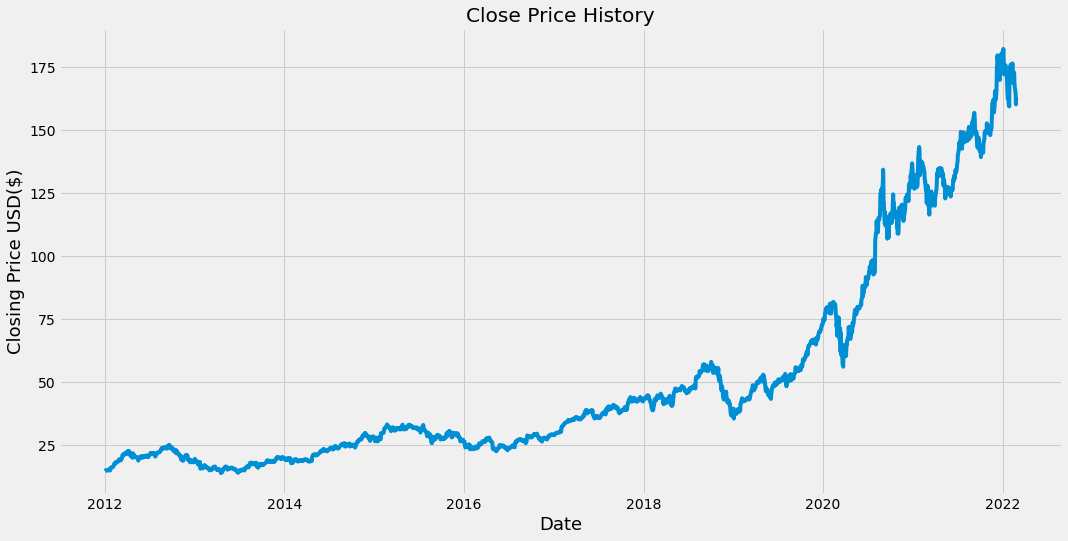

In [4]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [5]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2044

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.89474161],
       [0.8694534 ],
       [0.88534034]])

In [7]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [8]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1984, 60, 1)

In [10]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
62/62 [==============================] - 8s 61ms/step - loss: 0.0016
Epoch 2/100
62/62 [==============================] - 7s 111ms/step - loss: 1.5532e-04
Epoch 3/100
62/62 [==============================] - 8s 126ms/step - loss: 1.4222e-04
Epoch 4/100
62/62 [==============================] - 6s 90ms/step - loss: 1.5115e-04
Epoch 5/100
62/62 [==============================] - 4s 65ms/step - loss: 1.2905e-04
Epoch 6/100
62/62 [==============================] - 7s 111ms/step - loss: 1.1784e-04
Epoch 7/100
62/62 [==============================] - 8s 123ms/step - loss: 1.0783e-04
Epoch 8/100
62/62 [==============================] - 8s 122ms/step - loss: 9.0671e-05
Epoch 9/100
62/62 [==============================] - 5s 78ms/step - loss: 8.6257e-05
Epoch 10/100
62/62 [==============================] - 4s 65ms/step - loss: 9.2563e-05
Epoch 11/100
62/62 [==============================] - 7s 118ms/step - loss: 8.0387e-05
Epoch 12/100
62/62 [==============================] - 8s 122m

62/62 [==============================] - 6s 88ms/step - loss: 1.7448e-05
Epoch 96/100
62/62 [==============================] - 6s 91ms/step - loss: 1.6083e-05
Epoch 97/100
62/62 [==============================] - 8s 122ms/step - loss: 1.7358e-05
Epoch 98/100
62/62 [==============================] - 8s 131ms/step - loss: 1.4728e-05
Epoch 99/100
62/62 [==============================] - 8s 132ms/step - loss: 2.2414e-05
Epoch 100/100
62/62 [==============================] - 7s 118ms/step - loss: 1.5891e-05


In [13]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
    


In [14]:
#convert the data to a numpy array
x_test = np.array(x_test)


In [15]:
#resahpe the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [16]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2.704887449975107


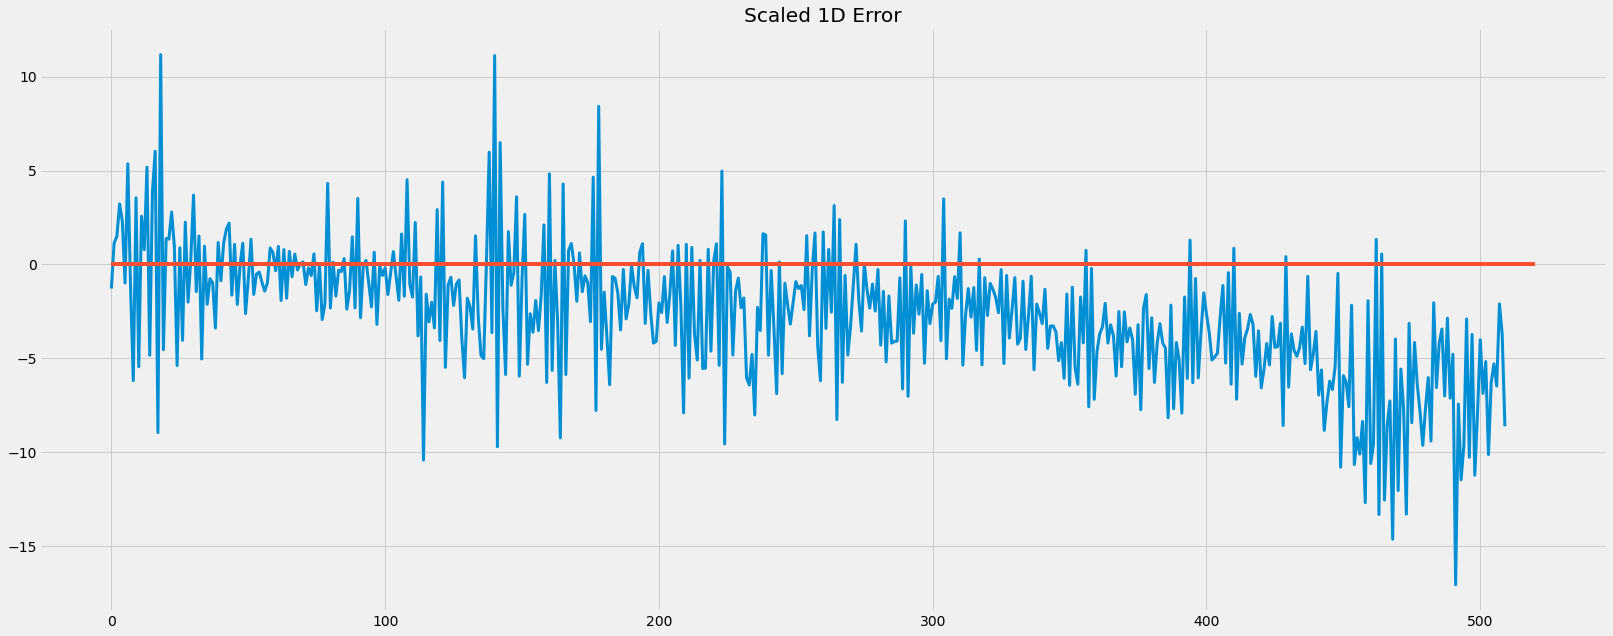

In [17]:
#get the root mean squared error (RMSE)
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
error = []
x = np.linspace(0, 520, 600)
y = np.linspace(0, 0, 600)
error.append(predictions - y_test)
nperr = np.array(predictions - y_test)
scaled_error = scaler.fit_transform(nperr)
plt.figure(figsize=(25,10))
plt.plot(nperr, linewidth=3)
plt.plot(x,y)
#plt.plot(scaled_error, linewidth=3)
plt.title("Scaled 1D Error")
plt.show()

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


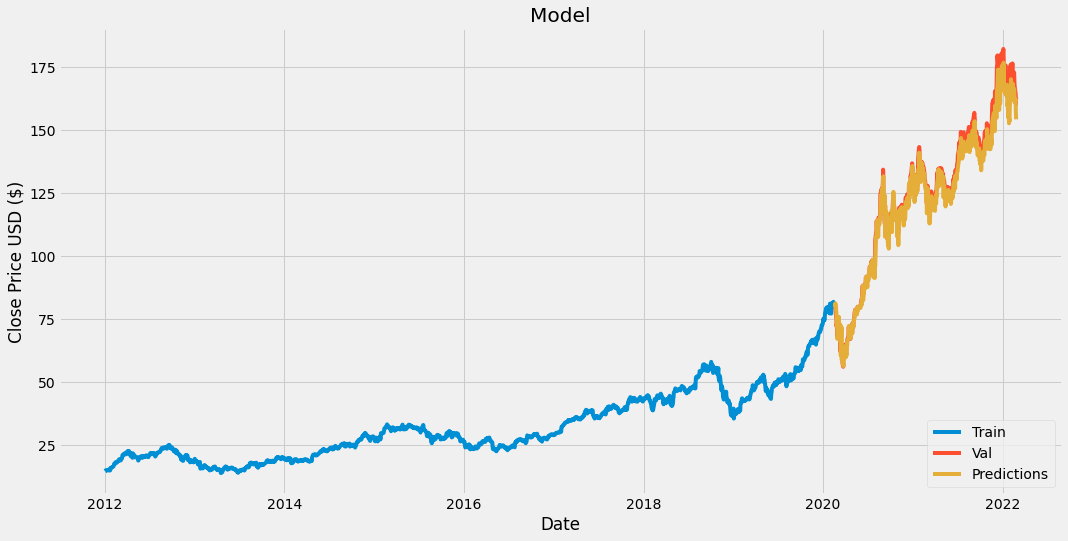

In [18]:
#plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-02-19,80.904999,79.626991
2020-02-20,80.074997,81.221596
2020-02-21,78.262497,79.753593
2020-02-24,74.544998,77.771973
2020-02-25,72.019997,74.328247
...,...,...
2022-02-17,168.880005,163.585342
2022-02-18,167.300003,160.822647
2022-02-22,164.320007,162.223801


In [20]:
#get the Quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2022-02-24')
#create new data frame
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create the empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[59.81172]]


In [21]:
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start='2022-02-25', end='2022-02-25')
print(apple_quote2['Close'])

Date
2022-02-24    162.740005
2022-02-25    164.850006
Name: Close, dtype: float64
